In this notebook, we compare the evolution of MMD, Wasserstein distance and Energy Distance of distributions $\hat{p}$ and $\hat{q}$ during KKL gradient descent.

In [5]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import ot

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_y as gy

In [33]:
def GD(J,dJ,x0,h,eps,n_it_max):
    x = x0 
    grad = dJ(x)
    J_val = J(x)
    X = [x0]
    i = 0 
    liste_J = []
    MMD = []
    Wass2 = []
    ED = []
    while np.linalg.norm(grad) > eps and i < n_it_max:
        if i%10 == 0:
            print("T = " + str(i))
        liste_J.append(J_val)
        grad = dJ(x)
        x = x - h * grad
        
        X.append(x)
        J_val = J(x)
        MMD.append(dv.MMD(x,y,k))
        ED.append(dv.energy_distance(x,y))
        
        a = np.ones((len(x),)) / len(x)
        b = np.ones((len(y),)) / len(y)
        M = ot.dist(x,y,metric = "euclidean")
        Wass2.append(ot.emd2(a, b, M))
        
        i = i + 1
    return np.array(X),liste_J,MMD,Wass2,ED

In [34]:
##############################
######## PARAMETERS ##########
##############################

n = 100 # nombre de particules pour p
m = 100 # nombre de particules pour q
T = 400 # nombre d'itérations
h = 0.004 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 0.15 
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

In [35]:
##############################
######## PARAMETERS ##########
##############################

n = 100 # nombre de particules pour p
m = 100 # nombre de particules pour q
T = 100 # nombre d'itérations
h = 2 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 5
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

In [36]:
####### INITIAL DISTRIBUTIONS P AND Q  ########


x0 = gy.gaussian(gy.mux,np.identity(2),n)
y = gy.mixt_gauss(gy.MU,[np.identity(2),np.identity(2)],[1/4,3/4],m)


#### Matrice Ky, eigenvalues and eigenvectors ####
Ky = 1/m * k(y,y) 
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

###########################################
############ GRADIENT DESCENT #############
###########################################


X,l_J,MMD,Wass2,ED = GD(J, dJ, x0, h, eps, T)


T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90


C:\Users\cleme\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\cleme\AppData\Local\Temp\ipykernel_22064\515075472.py:17: UserWarning: Glyph 7 () missing from current font.
  plt.savefig('plots_neurips/comaparaison_distances.pdf')
C:\Users\cleme\AppData\Local\Temp\ipykernel_22064\515075472.py:17: UserWarning: Glyph 7 () missing from current font.
  plt.savefig('plots_neurips/comaparaison_distances.pdf')


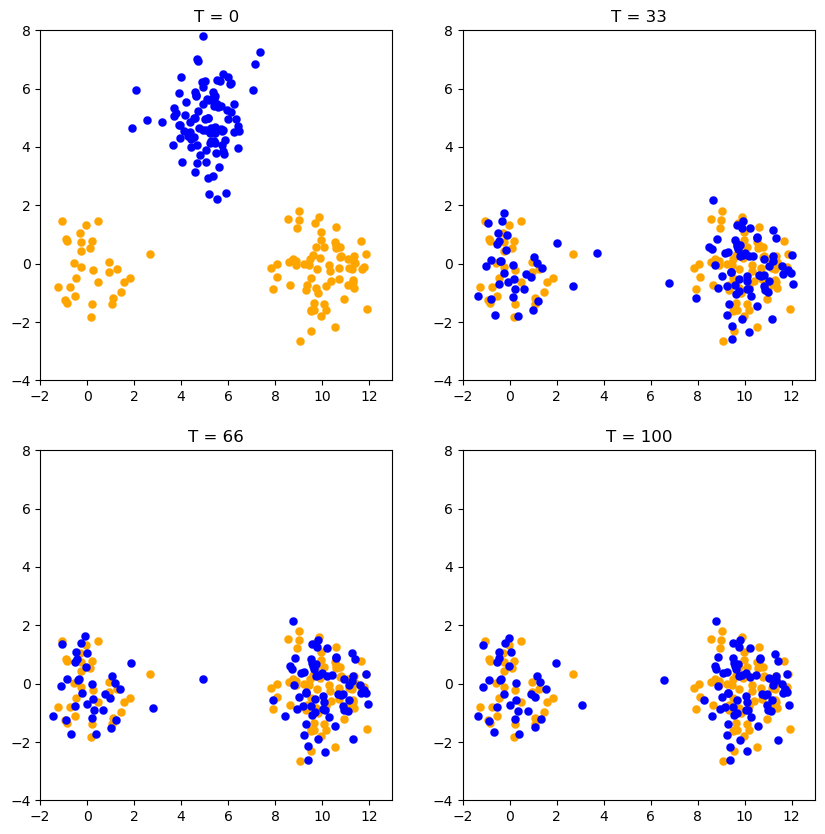

C:\Users\cleme\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


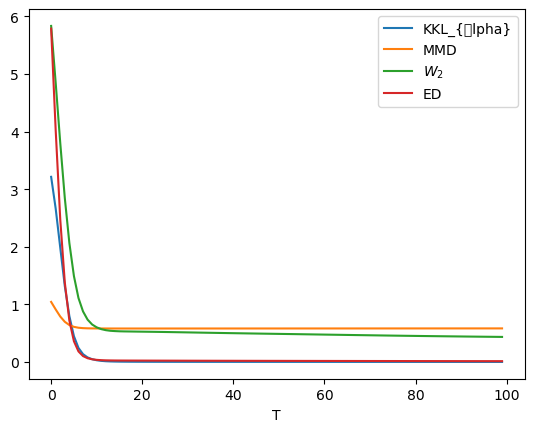

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    t = i * (T) // 3
    axs[i//2,i%2].axis([-2,13,-4,8])
    axs[i//2,i%2].scatter(y[:,0],y[:,1],color = "orange",linewidth = 0.1)
    axs[i//2,i%2].scatter(X[t,:,0], X[t,:,1], color = "blue",linewidth=0.1)
    axs[i//2,i%2].set_title("T = " + str(t))
    

plt.figure()
plt.plot(l_J,label = "KKL_{\alpha}")
plt.plot(MMD,label = "MMD")
plt.plot(Wass2,label = r"$W_2$")
plt.plot(ED,label = "ED")
plt.xlabel("T")
plt.legend()
plt.savefig('plots_neurips/comaparaison_distances.pdf')
